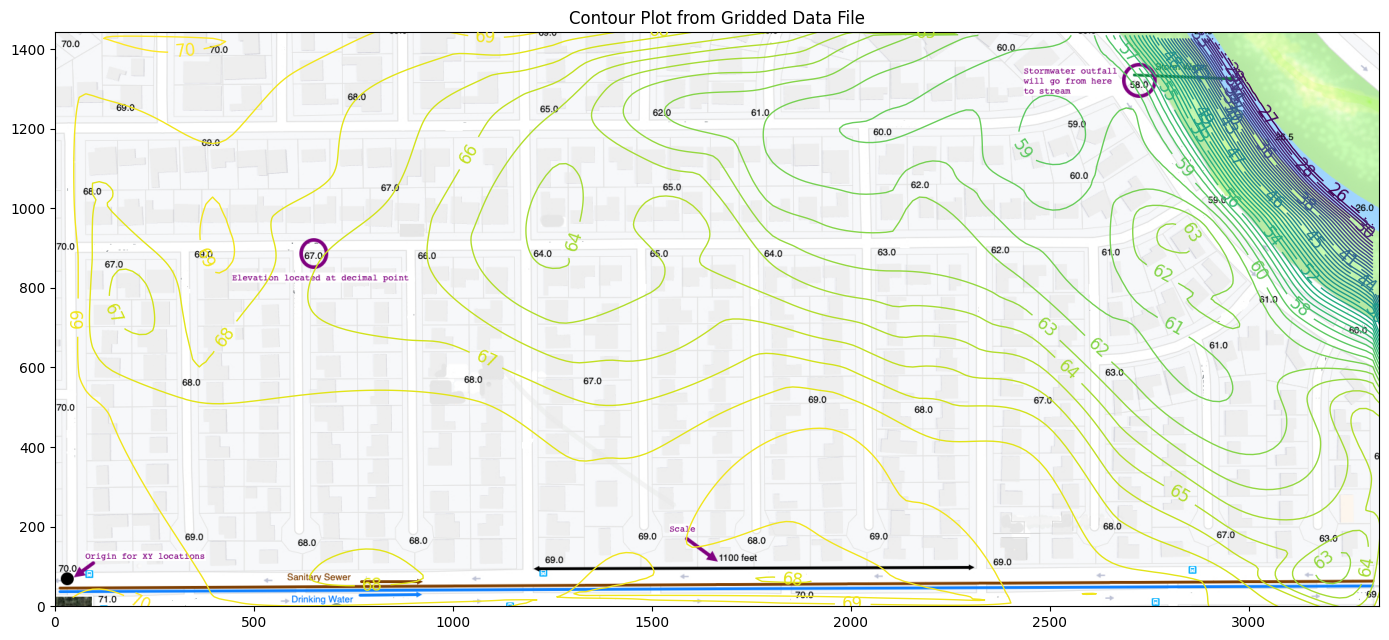

In [1]:
# CCMR from ENGR-1330:
# http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/Lab07.html
# https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
# https://stackoverflow.com/questions/18730044/converting-two-lists-into-a-matrix
# https://stackoverflow.com/questions/3242382/interpolation-over-an-irregular-grid
# https://stackoverflow.com/questions/33919875/interpolate-irregular-3d-data-from-a-xyz-file-to-a-regular-grid
import pandas
my_xyz = pandas.read_csv('XYZSomewhereUSA.txt',sep='\t') # read an ascii file already prepared, delimiter is tabs
#my_xyz = pandas.read_csv('XYZSomewhereUSA.txt',sep=' ') # read an ascii file already prepared, delimiter is tabs
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
#print(my_xyz) #examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz['X-Easting'].values.tolist()
coord_y = my_xyz['Y-Northing'].values.tolist()
coord_z = my_xyz['Z-Elevation'].values.tolist()
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 200)
lat = numpy.linspace(min(coord_y), max(coord_y), 200)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use cubic spline interpolation (other choices are nearest and linear)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic', fill_value = 'nan')
# Build the map
flag=True
if flag:
    matplotlib.pyplot.rcParams["figure.figsize"] = [15.0, 6.50] #adjust to make plot bigger, keep the aspect ratio or will fuck things up
    matplotlib.pyplot.rcParams["figure.autolayout"] = True
    im = matplotlib.pyplot.imread("SomewhereUSABaseMap.png") # base image
fig, ax = matplotlib.pyplot.subplots()
if flag: 
    im = ax.imshow(im, extent=[0, 3361, 0, 1458])# sets X and Y plot window of basemap
#fig.set_size_inches(14, 7)
levels=[]
for i in range(26,71,1):
    levels.append(float(i))
CS = ax.contour(X, Y, Z, levels, linewidths=1) # read how to change color scheme
ax.clabel(CS, inline=2, fontsize=12)
ax.set_title('Contour Plot from Gridded Data File')
ax.set_xlim([0,3328])
ax.set_ylim([0,1442]);